In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
from scipy.linalg import dft
import numpy as np
import math

import time
import itertools as itertools

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm

# Exercise 4-1

### Compute the fast fourier transform

In [4]:
iterations = 1000
k_end = 16

k = {}
v = {}
d = {}
for i in range (2,k_end):
    k["k" + str(i)] = i
    v["v" + str(i)] = 2**i
    tt = 0

    for j in range (1,iterations):
        random_vals = np.random.rand(v["v" + str(i)])
        
        t = time.time()
        np.fft.fft(random_vals)
        t2 = time.time() - t
        tt = tt + t2
        
    d["d" + str(i)] = tt/iterations

In [5]:
#convert dictionaries to lists to plot
index_fft = list(k.values())
times_fft = list(d.values())

### Compute the fourier transform

In [6]:
iterations = 100
k_end = 12

k = {}
v = {}
d = {}
for i in range (2,k_end):
    k["k" + str(i)] = i
    v["v" + str(i)] = 2**i
    tt = 0

    for j in range (1,iterations):
        random_vals = np.random.rand(v["v" + str(i)])
        
        t = time.time()
        m= dft(len(random_vals))
        m.dot(random_vals)
        t2 = time.time() - t
        tt = tt + t2
        
    d["d" + str(i)] = tt/iterations

In [7]:
#convert dictionaries to lists to plot
index_dft = list(k.values())
times_dft = list(d.values())

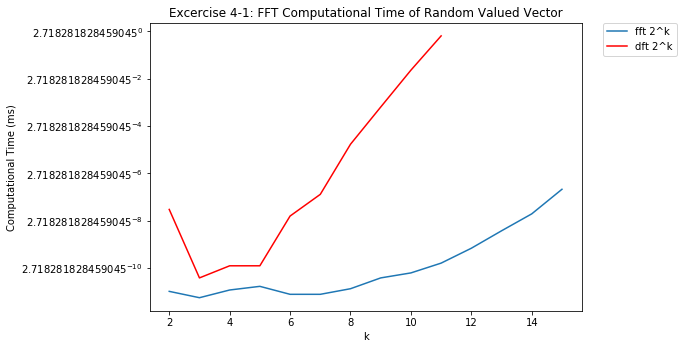

In [8]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(index_fft,times_fft, label = 'fft 2^k')
ax.plot(index_dft,times_dft, label = 'dft 2^k', color = "red")

#title axis
ax.set_xlabel('k')
ax.set_ylabel('Computational Time (ms)')
ax.set_title('Excercise 4-1: FFT Computational Time of Random Valued Vector')
ax.set_yscale('log', basey = np.e)

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()